## Loan Eligibility Prediction

In [20]:
# importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [21]:
# reading loan data
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
# data size
df.shape

(614, 13)

In [23]:
# data structure and format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
# descriptive statistics #IQR
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
# distribution in each column
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("-"*50)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
--------------------------------------------------
Gender
Male      489
Female    112
Name: Gender, dtype: int64
--------------------------------------------------
Married
Yes    398
No     213
Name: Married, dtype: int64
--------------------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------------------
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------------------------------------------------
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
--------------------------------------------------
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: Applica

In [26]:
# total missing values
df.isnull().sum().sum()

149

In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
# cleaning
df.drop(['Loan_ID'], axis=1, inplace=True)

### EDA - Exploratory Data Analysis
- exploring distribution
- visualization

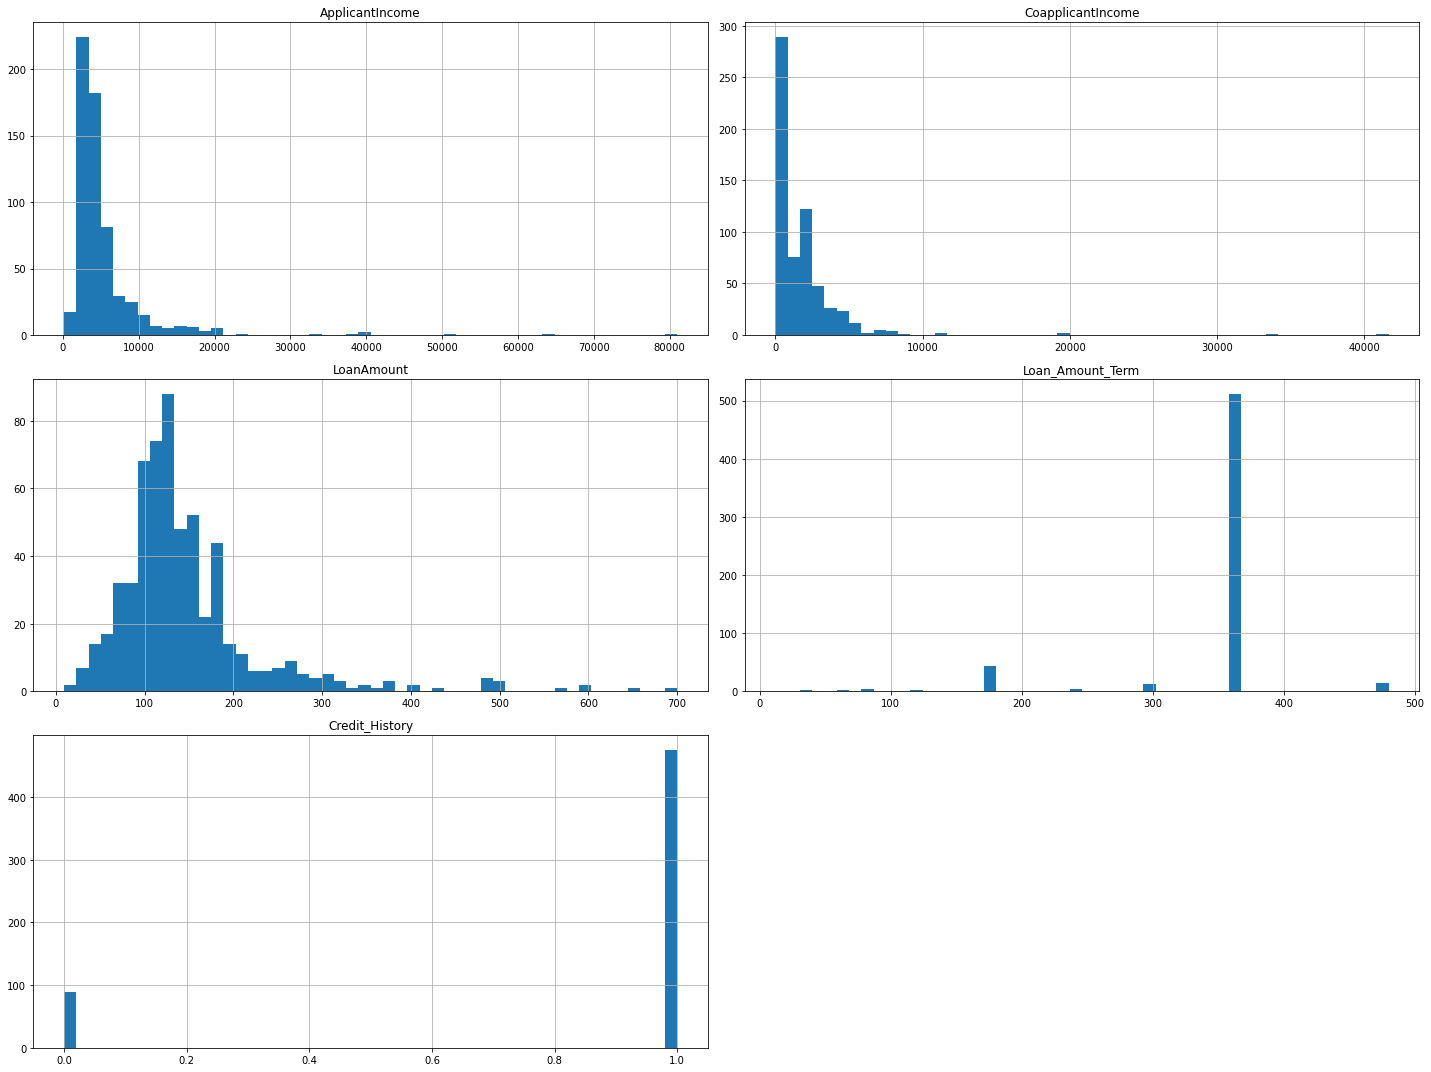

In [29]:
# distribution of values in each column
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()    
plt.show()

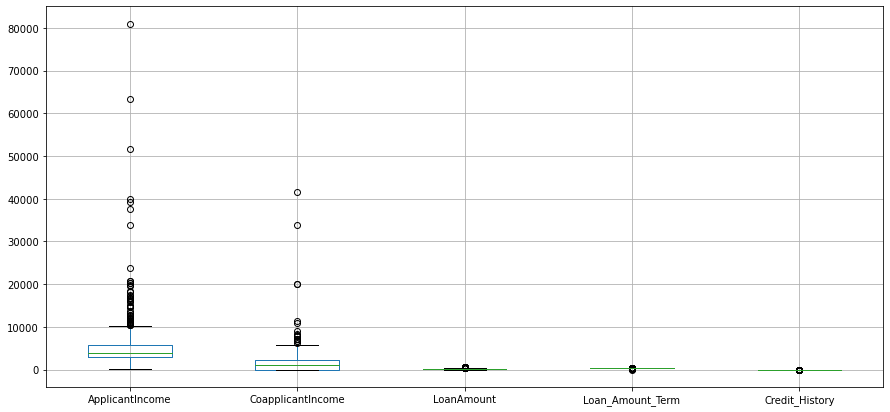

In [30]:
# boxplot
plt.figure(figsize=(15, 7))
df.boxplot()
plt.show()

In [31]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
# replacing the outliers with medians
median_ApplicantIncome = df.loc[df['ApplicantIncome'] > 10000, 'ApplicantIncome'].median()
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] > 10000, median_ApplicantIncome, df['ApplicantIncome'])

median_CoapplicantIncome = df.loc[df['CoapplicantIncome'] > 5000, 'CoapplicantIncome'].median()
df["CoapplicantIncome"] = np.where(df["CoapplicantIncome"] > 5000, median_CoapplicantIncome, df['CoapplicantIncome'])

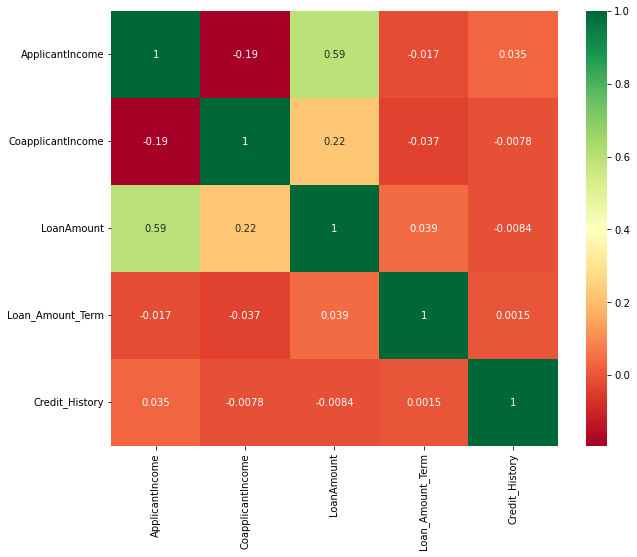

In [33]:
# correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [34]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

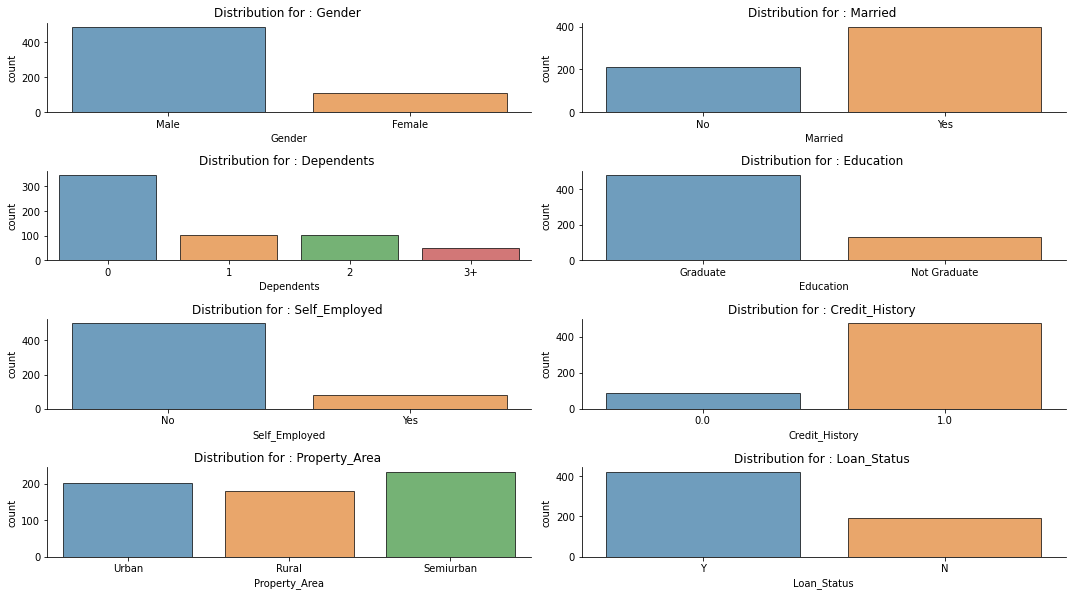

In [35]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,10])
fft=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Distribution for : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum().sum()

0

### Train & Test Split

In [39]:
seed = 7
X, y = df.drop('Loan_Status', axis=1), df["Loan_Status"]

In [40]:
X['Dependents'].head()

1    1
2    0
3    0
4    0
5    2
Name: Dependents, dtype: object

In [41]:
dep_map = {
    '0':0,
    '1':1,
    '2':2,
    '3+':3
}
X['Dependents'] = X['Dependents'].map(dep_map)
X['Dependents'].head()

1    1
2    0
3    0
4    0
5    2
Name: Dependents, dtype: int64

In [42]:
# One-hot encoding for categorical variables
cat_features = []
for col in X.columns :
    if X[col].dtype == 'object' :
        cat_features.append(col)
cat_features

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [45]:
for col in X.columns:
    if col in cat_features:
        print(X[col].unique())

['Male' 'Female']
['Yes' 'No']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']


In [46]:
dummies_gender = pd.get_dummies(X['Gender'], drop_first=True)
dummies_married = pd.get_dummies(X['Married'], prefix = 'Married', drop_first=True)
dummies_self_emp = pd.get_dummies(X['Self_Employed'], prefix = 'Self_Employed', drop_first=True)
dummies_edu = pd.get_dummies(X['Education'], drop_first=True)
dummies_prop = pd.get_dummies(X['Property_Area'], drop_first=True)

In [47]:
encode_df = pd.concat([dummies_gender, dummies_married, dummies_self_emp, dummies_edu, dummies_prop], axis=1)
encode_df.head()

,Male,Married_Yes,Self_Employed_Yes,Not Graduate,Semiurban,Urban
1,1,1,0,0,0,0
2,1,1,1,0,0,1
3,1,1,0,1,0,1
4,1,0,0,0,0,1
5,1,1,1,0,0,1


In [48]:
X.drop(cat_features, axis=1, inplace=True)

In [49]:
X = pd.concat([X, encode_df], axis=1)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married_Yes,Self_Employed_Yes,Not Graduate,Semiurban,Urban
1,1,4583.0,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,0,1
3,0,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,1
4,0,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,1
5,2,5417.0,4196.0,267.0,360.0,1.0,1,1,1,0,0,1


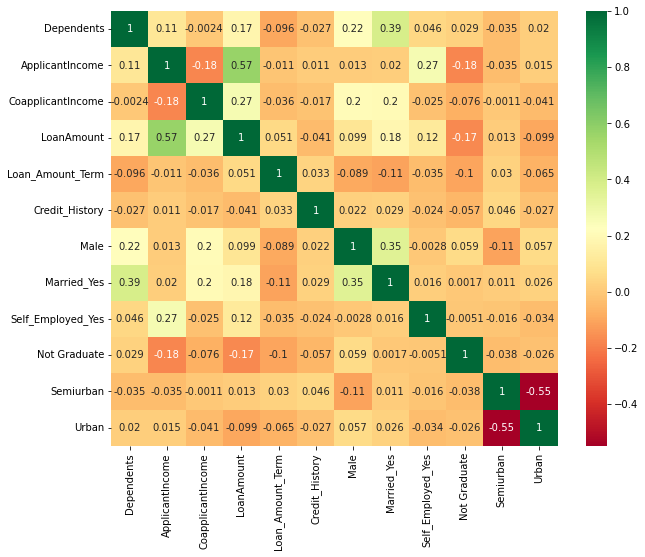

In [65]:
# correlation between all variables
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [50]:
y_2 = []
for x in y:
    if x == "Y":
        y_2.append(1)
    else:
        y_2.append(0)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed) 
print("Dataset:", len(X_train), "train +", len(X_test), "test")

Dataset: 336 train + 144 test


### Machine Learning

- Logistic regression
- Linear Support Vector Machines 
- Nearest Centroids 
- Decision Tree
- Random Forest

In [52]:
# libraries for machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [53]:
classifier_namess = ["logistic regression", "linear SVM", "nearest centroids", "decision tree", "random forest"]
classifiers = [LogisticRegression(), LinearSVC(), NearestCentroid(), DecisionTreeClassifier(), RandomForestClassifier()]
        
cross_val_scores = []
for classifier in classifiers:
    classifier_names = classifier.fit(X_train, y_train) #fit trains the model
    scores = cross_val_score(classifier, X_train, y_train, cv=10) #10-fold cv
    cross_val_scores.append(np.mean(scores))
print("Classifiers:", classifier_namess)
print("Cross-Validation:", cross_val_scores)

Classifiers: ['logistic regression', 'linear SVM', 'nearest centroids', 'decision tree', 'random forest']
Cross-Validation: [0.8066844919786096, 0.634848484848485, 0.571301247771836, 0.7022281639928699, 0.7977718360071301]


### Feature Selection
- Bagging
- AdaBoost
- Voting classifier

In [54]:
from sklearn.ensemble import BaggingClassifier
for i, classifier in enumerate(classifiers):
    bg = BaggingClassifier(classifier, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=7)
    bg.fit(X_train, y_train)
    print("Bagging of {}".format(classifier_namess[i]), bg.score(X_test, y_test))


Bagging of logistic regression 0.7986111111111112
Bagging of linear SVM 0.6458333333333334
Bagging of nearest centroids 0.5555555555555556
Bagging of decision tree 0.7569444444444444
Bagging of random forest 0.7847222222222222


In [56]:
from sklearn.ensemble import AdaBoostClassifier
# boosting - adaboost decision tree, random forest 

adb_dt = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators= 5, learning_rate=1, random_state=seed)
adb_rf = AdaBoostClassifier(RandomForestClassifier(), n_estimators= 5, learning_rate=1, random_state=seed)

adb_dt.fit(X_train, y_train)
print("AdaBoostClassifying of DecisionTree: ", adb_dt.score(X_test, y_test))
adb_rf.fit(X_train, y_train)
print("AdaBoostClassifying of RandomForest: ", adb_rf.score(X_test, y_test))

AdaBoostClassifying of DecisionTree:  0.6527777777777778
AdaBoostClassifying of RandomForest:  0.7708333333333334


In [57]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([("logistic regression", LogisticRegression(C=100)),
                           ("random forest", RandomForestClassifier()),
                          ],
                         voting = "soft") 
voting.fit(X_train, y_train)
print("VotingClassifiers:", voting.score(X_test, y_test))

VotingClassifiers: 0.7916666666666666


### Feature Importance 
DecisionTreeClassifier

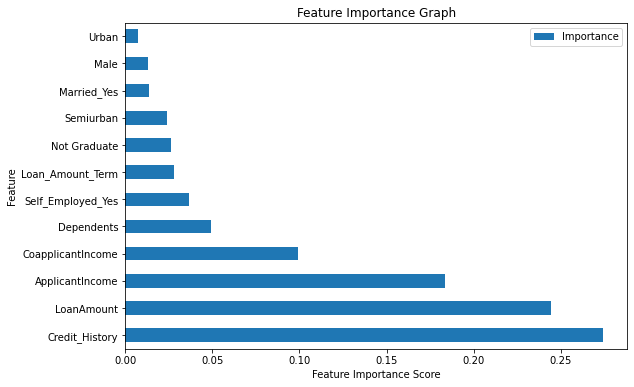

In [64]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
fea_imp = pd.DataFrame({'Importance':dt.feature_importances_}) 
fea_imp['Feature'] = X_train.columns
fea_imp.sort_values(by='Importance', ascending=False, inplace=True)
fea_imp = fea_imp.set_index('Feature', drop=True)
fea_imp.plot.barh(title='Feature Importance Graph', figsize=(9,6))
plt.xlabel('Feature Importance Score')
plt.show()

## Thank You